In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# find current working directory using os module
os.getcwd()

'/Users/Tarek/Documents/masterRootAppFolder/EarlyDetection3DPrinterIssues'

In [3]:
DATA_PATH = '/Volumes/Photo SanDisk Pro/EarlyDetection3DPrinterIssues/early-detection-of-3d-printing-issues'
# reset path to data directory
os.chdir(DATA_PATH)

In [4]:
cwd = os.getcwd()
cwd

'/Volumes/Photo SanDisk Pro/EarlyDetection3DPrinterIssues/early-detection-of-3d-printing-issues'

In [5]:
os.listdir(cwd)

['images', 'test.csv', 'train.csv', 'sample_submission.csv']

In [6]:
# load train dataset into a dataframe
train_df = pd.read_csv('./train.csv')

In [7]:
train_df.head()

,img_path,printer_id,print_id,has_under_extrusion
0,101/1678589738/1678589914.060332.jpg,101,1678589738,1
1,101/1678589738/1678589914.462857.jpg,101,1678589738,1
2,101/1678589738/1678589914.875075.jpg,101,1678589738,1
3,101/1678589738/1678589915.284495.jpg,101,1678589738,1
4,101/1678589738/1678589915.700486.jpg,101,1678589738,1


In [31]:
np.unique(train_df['printer_id'])

array([ 22, 101, 102, 103, 104])

In [8]:
# view size of dataframe
train_df.shape

(81060, 4)

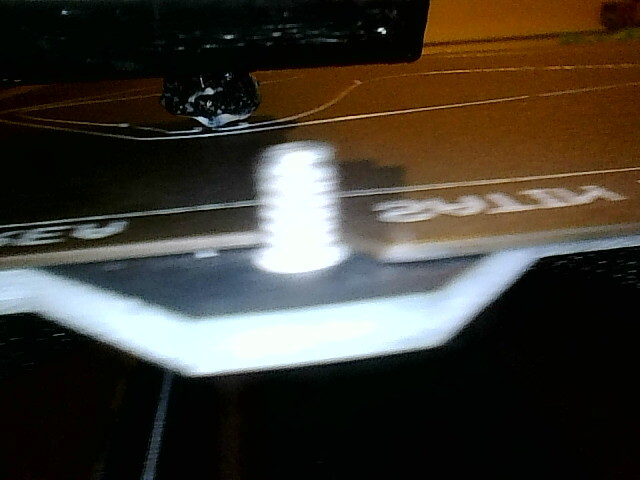

In [9]:
# render the first image of the train dataset
train_image = Image.open('./images/' + train_df['img_path'][0])
train_image

In [10]:
# create a function to render a train image from dataframe
def render_train_image(index):
        train_image = Image.open('./images/' + train_df['img_path'][index])
        return train_image

In [11]:
# create a function to transform jpg train image to a numpy array
def train_image_to_array(index):
        train_image = Image.open('./images/' + train_df['img_path'][index])
        train_image_array = np.array(train_image)
        return train_image_array

In [12]:
image_1_array = train_image_to_array(0)
image_1_array.shape

(480, 640, 3)

In [13]:
# calculate how much memory a single image array takes up
image_1_array.nbytes

921600

In [14]:
# create an array of unique printer_ids and print_id from the train dataset
printer_print_id_df = train_df[['printer_id', 'print_id']].drop(0)

In [22]:
# generate list of unique printer_id and print_id pairs
printer_print_id_list = printer_print_id_df.values

In [24]:
printer_print_id_list.shape

(81059, 2)

In [26]:
unique_printer_print_id_list = np.unique(printer_print_id_list, axis=0)
unique_printer_print_id_list.shape

(52, 2)

In [29]:
unique_printer_print_id_list[0:2]

array([[        22, 1672709609],
       [        22, 1672767789]])

In [37]:
def list_printer_print_images(printer_id, print_id):
        printer_print_images = train_df.loc[(train_df['printer_id'] == printer_id) & (train_df['print_id'] == print_id)]
        return printer_print_images['img_path'].values

In [39]:
first_pair = unique_printer_print_id_list[0]
printer_id, print_id = first_pair[0], first_pair[1]
first_pair_img_paths = list_printer_print_images(printer_id, print_id)
first_pair_img_paths

array(['022/1672709609/1672709790.713084.jpg',
       '022/1672709609/1672709791.726076.jpg',
       '022/1672709609/1672709792.729402.jpg',
       '022/1672709609/1672709793.741517.jpg',
       '022/1672709609/1672709794.751976.jpg',
       '022/1672709609/1672709795.763594.jpg',
       '022/1672709609/1672709796.781538.jpg',
       '022/1672709609/1672709797.798649.jpg',
       '022/1672709609/1672709798.838797.jpg',
       '022/1672709609/1672709799.850112.jpg',
       '022/1672709609/1672709800.86497.jpg',
       '022/1672709609/1672709801.87547.jpg',
       '022/1672709609/1672709802.883232.jpg',
       '022/1672709609/1672709803.901452.jpg',
       '022/1672709609/1672709804.919671.jpg',
       '022/1672709609/1672709805.93538.jpg',
       '022/1672709609/1672709806.937839.jpg',
       '022/1672709609/1672709807.958159.jpg',
       '022/1672709609/1672709808.976463.jpg',
       '022/1672709609/1672709809.978222.jpg',
       '022/1672709609/1672709810.980052.jpg',
       '022/1672

In [43]:
# Create a function to save a list of images to a single .npy file
def save_images_to_npy(img_paths, printer_id, train=True):
        img_array_list = []
        for img_path in img_paths:
                img = Image.open('./images/' + img_path)
                img_array = np.array(img)
                img_array_list.append(img_array)
        img_array_list = np.array(img_array_list)
        if train:
                np.save('./images/train_arrays/printer_id_' + str(printer_id) + '.npy', img_array_list)
        else:
                np.save('./images/test_arrays/printer_id_' + str(printer_id) + '.npy', img_array_list)

In [44]:
save_images_to_npy(first_pair_img_paths, printer_id, train=True)

In [45]:
# Create a function to read .npy file and return a numpy array
def read_npy_file(printer_id, train=True):
        if train:
                img_array = np.load('./images/train_arrays/printer_id_' + str(printer_id) + '.npy')
        else:
                img_array = np.load('./images/test_arrays/printer_id_' + str(printer_id) + '.npy')
        return img_array

In [46]:
train_images_22 = read_npy_file(22, train=True)

In [47]:
train_images_22.shape

(307, 720, 1280, 3)

In [49]:
# Create a function to convert numpy array to image and view image
def array_to_image(img_array):
        img = Image.fromarray(img_array)
        print(img)
        return img

<PIL.Image.Image image mode=RGB size=1280x720 at 0x7FB70FA073D0>


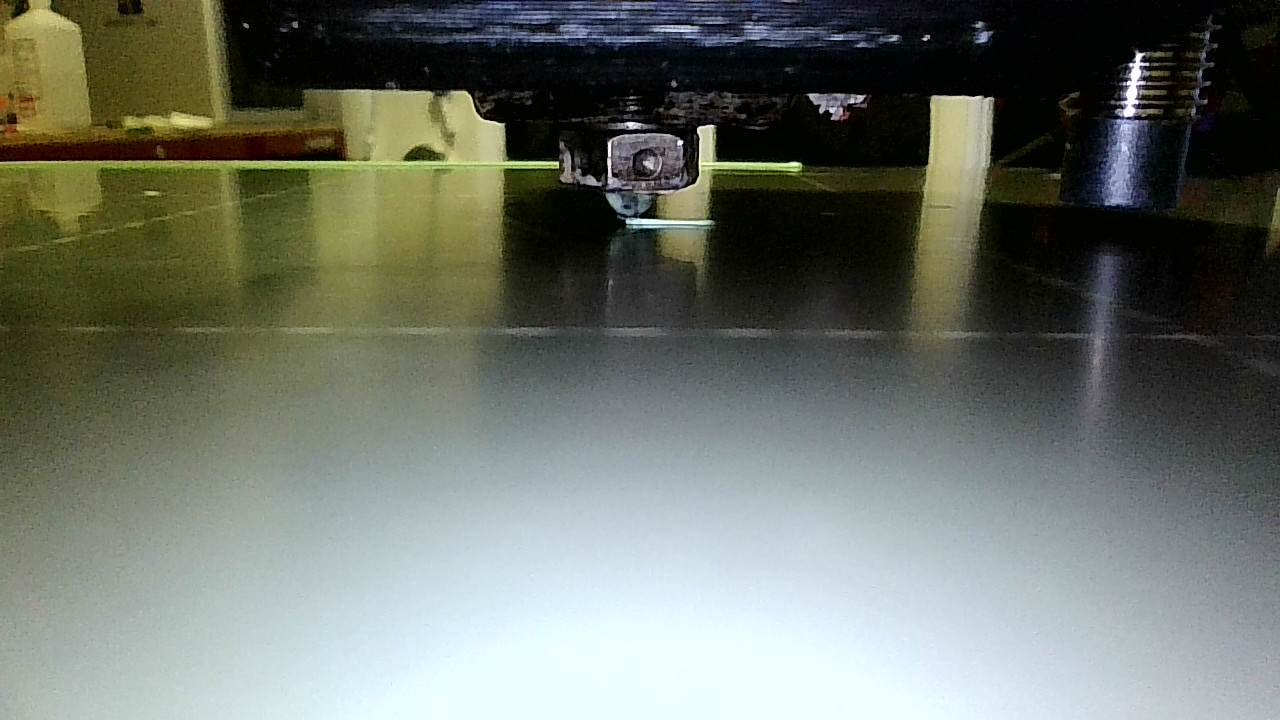

In [50]:
array_to_image(train_images_22[0])

In [48]:
# Create a function to save all images in the train dataset to .npy files
def save_all_train_images_to_npy():
        for pair in unique_printer_print_id_list:
                printer_id, print_id = pair[0], pair[1]
                img_paths = list_printer_print_images(printer_id, print_id)
                save_images_to_npy(img_paths, printer_id, train=True)

In [51]:
save_all_train_images_to_npy()

In [ ]:
# for each subfolder of images in the train dataset, create a zipfile of .npy arrays
# this will be used to load the images into memory for training
import zipfile
import glob


In [13]:
train_image_arrays = []
unique_train_images_shapes = []

In [14]:
# loop through each image in train dataset and check if the numpy shape are the same
for i in range(0, len(train_df)):
        image_array = train_image_to_array(i)
        train_image_arrays.append(image_array)
        if image_array.shape != image_1_array.shape:
                print(f'Image shape is not {image_1_array.shape} at index: ', i)
                unique_train_images_shapes.append(i)